# Random Forest tutorial

## 초기 설정

In [14]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import pandas as pd

## Classification

### 데이터 로드

In [2]:
# scikit-learn의 유방암 데이터 셋 사용
breast_cancer_data = load_breast_cancer()

In [3]:
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
# 클래스는 악성과 양성으로 나누어짐
breast_cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

### 데이터 전처리

In [5]:
X = pd.DataFrame(breast_cancer_data.data)
y = pd.DataFrame(breast_cancer_data.target)

In [6]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [11]:
# 학습/테스트 데이터 분류 (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
y_train = y_train.values.reshape(-1)
y_test = y_test.values.reshape(-1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

### 모델 생성 및 평가

In [12]:
# 100개의 트리로 구성된 랜덤 포레스트 모델
classify_forest = RandomForestClassifier(n_estimators=100, random_state=3)
classify_forest.fit(X_train, y_train)

# 학습/테스트 데이터에 대해 성능 평가
print(f'Train set accuracy: {classify_forest.score(X_train, y_train):.3f}')
print(f'Test set accuracy: {classify_forest.score(X_test, y_test):.3f}')

Train set accuracy: 1.000
Test set accuracy: 0.974


- 기존의 결정 트리에 비해 성능이 향상됨
- 결정 트리의 경우 max_depth=4 일 때, train accuracy=0.976 / test accuracy=0.930

In [13]:
# 부스팅 모델 (기본값: depth=3, learning_rate=0.1)
classify_boost = GradientBoostingClassifier(random_state=3)
classify_boost.fit(X_test, y_test)

# 학습/테스트 데이터에 대해 성능 평가
print(f'Train set accuracy: {classify_boost.score(X_train, y_train):.3f}')
print(f'Test set accuracy: {classify_boost.score(X_test, y_test):.3f}')

Train set accuracy: 0.901
Test set accuracy: 1.000


- 학습 데이터에 대해 정확도가 떨어졌으나, 테스트 데이터에서 정확도가 높아짐

### 특성 중요도 평가

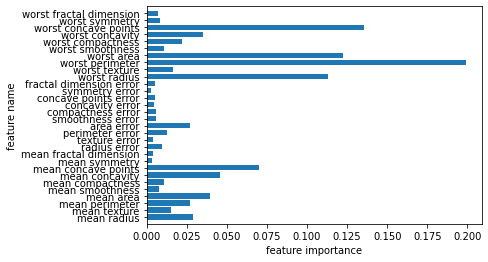

In [15]:
# 결정 트리의 특성 중요도를 시각화
def plot_feature_importance(data, model):
    n_features = len(data.feature_names)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(range(n_features), data.feature_names)
    plt.xlabel('feature importance')
    plt.ylabel('feature name')
    plt.ylim(-1, n_features)
    plt.show()

# 랜덤 포레스트의 특성 중요도
plot_feature_importance(breast_cancer_data, classify_forest)

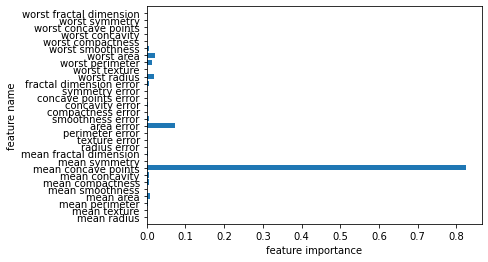

In [16]:
# 그래디언트 부스트의 특성 중요도
plot_feature_importance(breast_cancer_data, classify_boost)

## Regression

### 데이터 로드

In [17]:
# scikit-learn의 당뇨병 데이터
# data의 경우 나이, 성별 등 환자의 특성
# target의 경우 baseline을 기준으로 한 질병의 진행 정도
diabetes_data = load_diabetes()

In [18]:
diabetes_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [19]:
X = pd.DataFrame(diabetes_data.data)
y = pd.DataFrame(diabetes_data.target)

In [20]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [21]:
y.head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


### 데이터 전처리

In [22]:
# 학습/테스트 데이터 분류 (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
y_train = y_train.values.reshape(-1)
y_test = y_test.values.reshape(-1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

### 모델 생성 및 평가

In [23]:
# 100개의 결정 트리를 갖는 랜덤 포레스트 회귀 모델
regression_forest = RandomForestRegressor(n_estimators=100 ,random_state=3)
regression_forest.fit(X_train, y_train)

# 학습/테스트 데이터에 대해 성능 평가
print(f'Train set accuracy: {regression_forest.score(X_train, y_train):.3f}')
print(f'Test set accuracy: {regression_forest.score(X_test, y_test):.3f}')

Train set accuracy: 0.921
Test set accuracy: 0.494


- 결정 트리의 경우 max_depth=7 일 때, train accuracy=0.836 / test accuracy=0.157

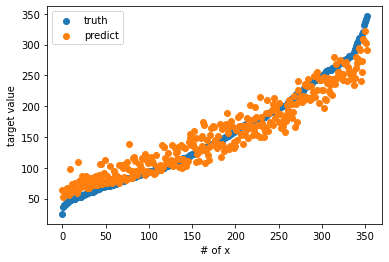

In [34]:
# 모델 예측 결과 확인을 위해 학습의 타겟/예측 데이터 정렬
pred_train = regression_forest.predict(X_train)
train_sort_indices = y_train.argsort()
y_train_sort = y_train[train_sort_indices]
pred_train_sort = pred_train[train_sort_indices]

# 학습 데이터에 대한 타겟/예측 값 확인
plt.scatter(range(len(y_train)), y_train_sort, label='truth')
plt.scatter(range(len(y_train)), pred_train_sort, label='predict')
plt.xlabel('# of x')
plt.ylabel('target value')
plt.legend()
plt.show()

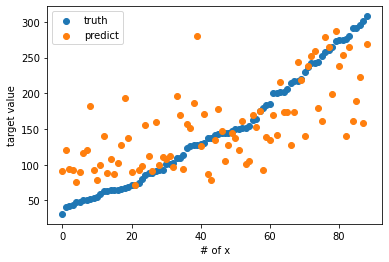

In [36]:
# 모델 예측 결과 확인을 위해 테스트의 타겟/예측 데이터 정렬
pred_test = regression_forest.predict(X_test)
test_sort_indices = y_test.reshape(-1).argsort()
y_test_sort = y_test[test_sort_indices]
pred_test_sort = pred_test[test_sort_indices]

# 테스트 데이터에 대한 타겟/예측 값 확인
plt.scatter(range(len(y_test)), y_test_sort, label='truth')
plt.scatter(range(len(y_test)), pred_test_sort, label='predict')
plt.xlabel('# of x')
plt.ylabel('target value')
plt.legend()
plt.show()

- 학습 데이터의 경우 우수한 성능을 보임
- 테스트 데이터의 경우 결정 트리보다 성능이 높아져, 어느 정도 경향성을 확인할 수 있음

In [31]:
# 부스팅 모델 (기본값: depth=3, learning_rate=0.1)
regression_boost = GradientBoostingRegressor(random_state=3)
regression_boost.fit(X_test, y_test)

# 학습/테스트 데이터에 대해 성능 평가
print(f'Train set accuracy: {regression_boost.score(X_train, y_train):.3f}')
print(f'Test set accuracy: {regression_boost.score(X_test, y_test):.3f}')

Train set accuracy: 0.343
Test set accuracy: 0.978


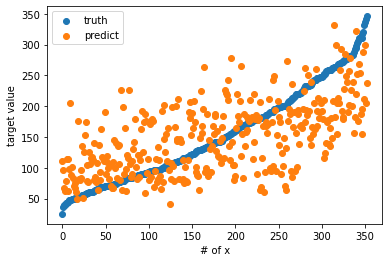

In [37]:
# 모델 예측 결과 확인을 위해 학습의 타겟/예측 데이터 정렬
pred_train = regression_boost.predict(X_train)
train_sort_indices = y_train.argsort()
y_train_sort = y_train[train_sort_indices]
pred_train_sort = pred_train[train_sort_indices]

# 학습 데이터에 대한 타겟/예측 값 확인
plt.scatter(range(len(y_train)), y_train_sort, label='truth')
plt.scatter(range(len(y_train)), pred_train_sort, label='predict')
plt.xlabel('# of x')
plt.ylabel('target value')
plt.legend()
plt.show()

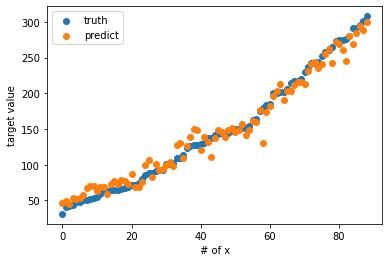

In [38]:
# 모델 예측 결과 확인을 위해 테스트의 타겟/예측 데이터 정렬
pred_test = regression_boost.predict(X_test)
test_sort_indices = y_test.reshape(-1).argsort()
y_test_sort = y_test[test_sort_indices]
pred_test_sort = pred_test[test_sort_indices]

# 테스트 데이터에 대한 타겟/예측 값 확인
plt.scatter(range(len(y_test)), y_test_sort, label='truth')
plt.scatter(range(len(y_test)), pred_test_sort, label='predict')
plt.xlabel('# of x')
plt.ylabel('target value')
plt.legend()
plt.show()

- 오히려 학습 데이터 셋에서 정확도가 낮으나 테스트 데이터 셋에서 매우 높은 정확도를 보임
- 학습 데이터가 불충분하여 이러한 결과가 나왔을 가능성이 있음

### 특성 중요도 평가

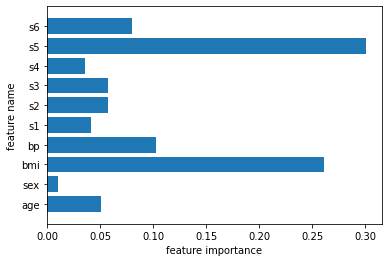

In [39]:
# 랜덤 포레스트 회귀 모델의 특성 중요도
plot_feature_importance(diabetes_data, regression_forest)

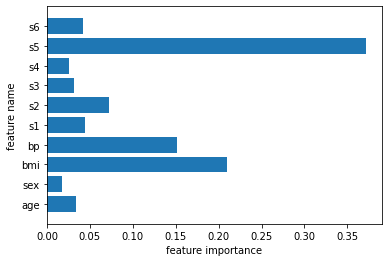

In [40]:
# 그래디언트 부스팅 모델의 특성 중요도
plot_feature_importance(diabetes_data, regression_boost)

- s5 특성이 랜덤 포레스트, 부스팅 그리고 이전 결정 트리에서 모두 가장 높은 중요도를 보임
- 랜덤 포레스트와 부스팅에서 특성 중요도가 비슷함에도 성능에서는 차이를 보임
- 특성 중요도의 유사성이 모델 성능의 유사성을 보증하지는 못함